This file contains code to create PCA plot, dispersion plot, and gene vs sample norm count heatmap

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")
library(DESeq2)
library(ggplot2)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2'”
Old packages: 'credentials', 'dbplyr', 'dtplyr', 'ggplot2', 'googledrive',
  'magrittr'



In [ ]:
BiocManager::install("ComplexHeatmap")
BiocManager::install("circlize")
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ComplexHeatmap'”
Old packages: 'credentials', 'dbplyr', 'dtplyr', 'ggplot2', 'googledrive',
  'magrittr'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'circlize'”
Old packages: 'credentials', 'dbplyr', 'dtplyr', 'ggplot2', 'googledrive',
  'magrittr'



In [ ]:
Counts <- read.csv("counts_file.csv", header = TRUE, row.names = 1, check.names = FALSE)
dim(Counts)
Counts <- Counts[which(rowSums(Counts) > 0),]
dim(Counts)

[1] 19568     8

[1] 16440     8

In [ ]:
condition <- factor(c("BPAF","BPAF","BPAF", "BPAF","Control","Control","Control","Control"))
coldata <- data.frame(row.names = colnames(Counts), condition)
coldata
dds <- DESeqDataSetFromMatrix(countData = Counts, colData = coldata, design = ~condition)
dds <- DESeq(dds)

,condition
,<fct>
SRR21043446,BPAF
SRR21043528,BPAF
SRR21043685,BPAF
SRR21043886,BPAF
SRR21043816,Control
SRR21043814,Control
SRR21043817,Control
SRR21043815,Control


  it appears that the last variable in the design formula, 'condition',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
dds

class: DESeqDataSet 
dim: 16440 8 
metadata(1): version
assays(4): counts mu H cooks
rownames(16440): ENSG00000175899 ENSG00000127837 ... ENSG00000111640
  ENSG00000108465
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(8): SRR21043446 SRR21043528 ... SRR21043817 SRR21043815
colData names(2): condition sizeFactor

using ntop=500 top features by variance



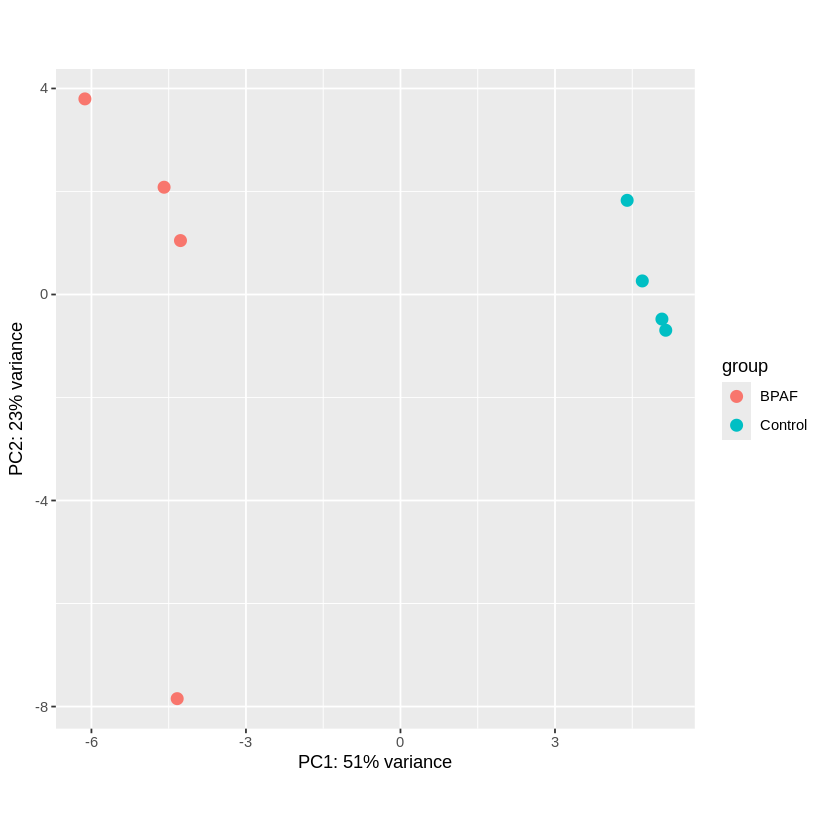

In [ ]:
vsdata <- vst(dds, blind=FALSE)
plotPCA(vsdata, intgroup = "condition")

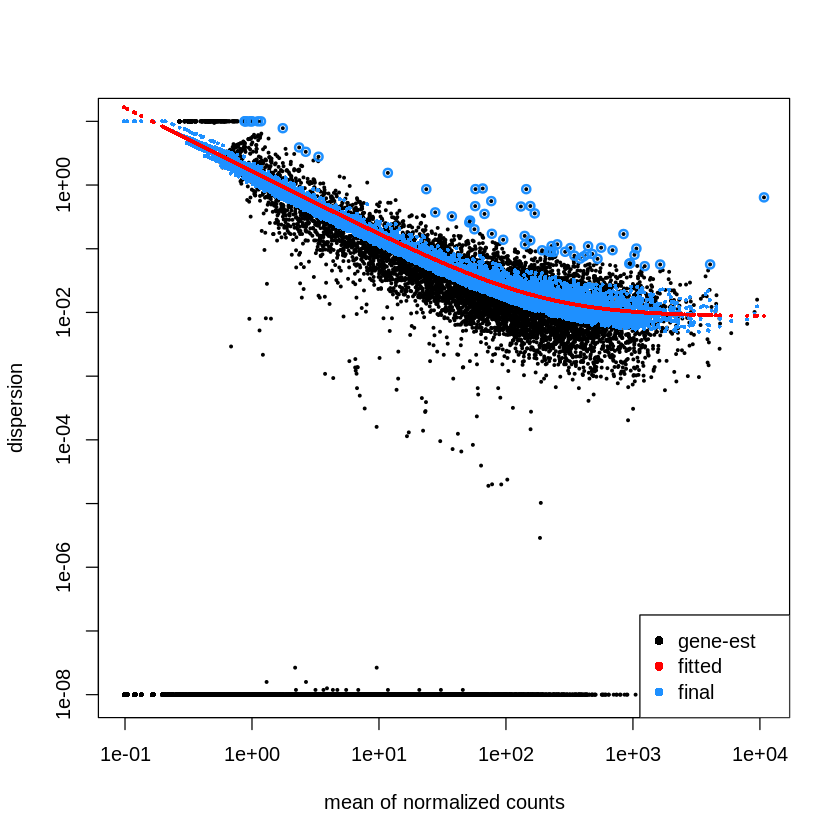

In [ ]:
plotDispEsts(dds)

In [ ]:
res <- results(dds, contrast = c("condition", "BPAF", "Control"))
res

log2 fold change (MLE): condition BPAF vs Control 
Wald test p-value: condition BPAF vs Control 
DataFrame with 16440 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat     pvalue
                 <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000175899   0.578471      -0.808471  2.170688 -0.372449  0.7095584
ENSG00000127837 157.015726       0.139923  0.154334  0.906623  0.3646060
ENSG00000090861 266.177539       0.226775  0.119669  1.895016  0.0580902
ENSG00000275700  32.367355       0.177712  0.275311  0.645496  0.5186056
ENSG00000085563   5.071979      -0.353448  0.713642 -0.495274  0.6204068
...                    ...            ...       ...       ...        ...
ENSG00000163138    2.42273       0.282871 0.9885705  0.286141 0.77477007
ENSG00000135486 2083.62078       0.175503 0.1074640  1.633134 0.10244092
ENSG00000168488  794.65719      -0.271757 0.0940683 -2.888931 0.00386554
ENSG00000111640 1442.35263       0.103393 0.1425738  0.72519

In [ ]:
sigs <- na.omit(res)
sigs <- sigs[sigs$padj < 0.05,]
print(sigs)
write.csv(sigs, file = "deseq_results.csv")
df <- as.data.frame(sigs)

log2 fold change (MLE): condition BPAF vs Control 
Wald test p-value: condition BPAF vs Control 
DataFrame with 573 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000120437   66.5234       0.869573  0.235167   3.69768 2.17579e-04
ENSG00000196139  120.5803      -0.742502  0.231913  -3.20163 1.36650e-03
ENSG00000106367  803.4800       0.440795  0.106900   4.12341 3.73297e-05
ENSG00000189058   60.2131      -1.503561  0.229277  -6.55784 5.45942e-11
ENSG00000184831   50.3666       0.764608  0.246081   3.10715 1.88903e-03
...                   ...            ...       ...       ...         ...
ENSG00000265808 1587.2221       0.314490 0.0857887   3.66587 2.46497e-04
ENSG00000268043 1153.4916      -0.378554 0.1099905  -3.44170 5.78070e-04
ENSG00000272398  957.0601      -0.695506 0.1519360  -4.57762 4.70288e-06
ENSG00000277224  123.8822       0.752845 0.2310943   3.25774 1

In [ ]:
if (!requireNamespace("AnnotationDbi", quietly = TRUE)) {
  BiocManager::install("AnnotationDbi")
}
if (!requireNamespace("org.Hs.eg.db", quietly = TRUE)) {
  BiocManager::install("org.Hs.eg.db")
}
library(org.Hs.eg.db)
library(AnnotationDbi)
# done this before
gene_symbols <- mapIds(
  org.Hs.eg.db,
  keys = rownames(df),
  column = "SYMBOL",
  keytype = "ENSEMBL",
  multiVals = "first"
)

df$symbol <- gene_symbols

'select()' returned 1:many mapping between keys and columns



Sort genes by log2FoldChange (to prioritize upregulated ones).

Get rlog-normalized expression counts (to stabilize variance).

Extract a matrix of significant genes × samples (for visualization).

Calculate average expression per gene (for reference).

Normalize each gene’s expression using Z-scores (so data is comparable).

Transpose matrix and restore sample names.


In [ ]:
df.top <- df[ (df$baseMean > 10) & (abs(df$log2FoldChange) > 1), ]
df.top <- df.top[order(df.top$log2FoldChange, decreasing = TRUE),]
rlog_out <- rlog(dds, blind=FALSE)
mat<-assay(rlog_out)[rownames(df.top), rownames(coldata)]
colnames(mat) <- rownames(coldata)
base_mean <- rowMeans(mat)
mat.scaled <- t(apply(mat, 1, scale))
colnames(mat.scaled)<-colnames(mat)

In [ ]:
num_keep <- 10
num_keep <- min(num_keep, nrow(mat.scaled) %/% 2)
rows_keep <- c(seq(1, num_keep), seq(max(nrow(mat.scaled) - num_keep + 1, num_keep + 1), nrow(mat.scaled)))
l2_val <- as.matrix(df.top[rows_keep,]$log2FoldChange)
colnames(l2_val)<-"logFC"
mean <- as.matrix(df.top[rows_keep,]$baseMean)
colnames(mean)<-"AveExpr"

null device 
          1

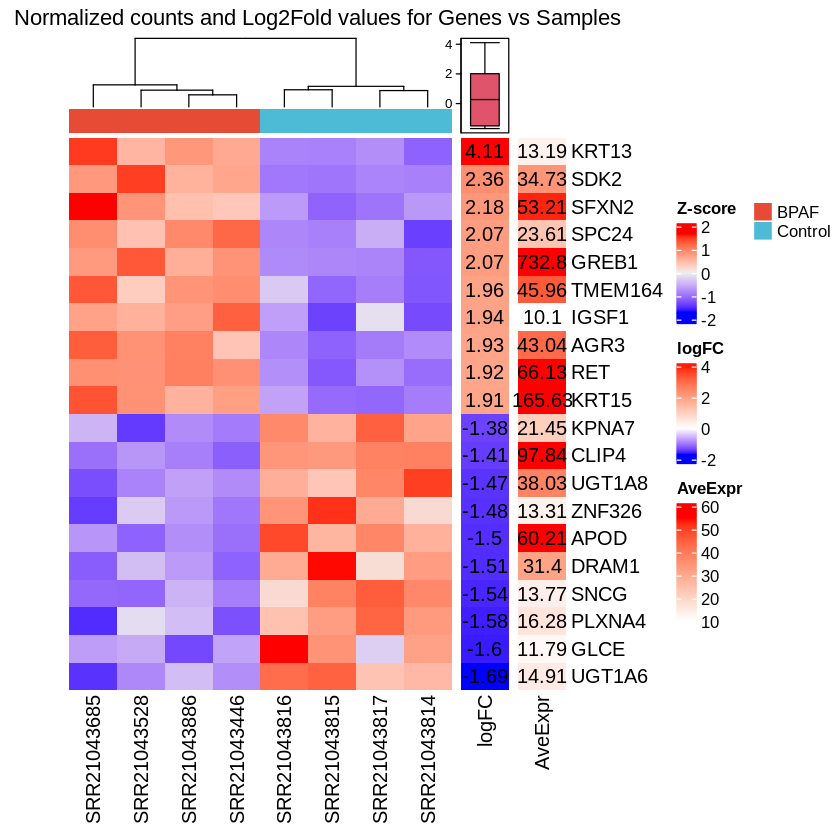

In [ ]:
library(ComplexHeatmap)
library(circlize)
col_logFC <- colorRamp2(c(min(l2_val), 0, max(l2_val)), c("blue", "white", "red"))
col_AveExpr <- colorRamp2(c(quantile(mean)[1], quantile(mean)[4]), c("white", "red"))
sample_groups <- coldata$condition
names(sample_groups) <- rownames(coldata)
group_colors <- c("Control" = "#4DBBD5", "BPAF" = "#E64B35")  # assuming C=Control, S=Treatment
top_anno <- HeatmapAnnotation(
  Group = sample_groups,
  col = list(Group = group_colors),
  annotation_legend_param = list(title = NULL),
  annotation_name_side = "left",
  annotation_name_gp = gpar(col = NA)  # <-- hides the "Group" label next to the bar
)
ha <- HeatmapAnnotation(summary = anno_summary(gp = gpar(fill = 2),
                                               height = unit(2, "cm")))
h1 <- Heatmap(mat.scaled[rows_keep, ],
              cluster_rows = FALSE,
              column_labels = colnames(mat.scaled),
              name = "Z-score",
              cluster_columns = TRUE,
              top_annotation = top_anno,
              column_title = "                   Normalized counts and Log2Fold values for Genes vs Samples" )  # <-- add group annotation here,

h2 <- Heatmap(l2_val,
              row_labels = df.top$symbol[rows_keep],
              cluster_rows = FALSE,
              name = "logFC",
              top_annotation = ha,
              col = col_logFC,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(l2_val[i, j], 2), x, y)
              })

h3 <- Heatmap(mean,
              row_labels = df.top$symbol[rows_keep],
              cluster_rows = FALSE,
              name = "AveExpr",
              col = col_AveExpr,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(mean[i, j], 2), x, y)
              })
h <- h1 + h2 + h3
draw(h, heatmap_legend_side = "right", annotation_legend_side = "right")
dev.off()

# make it more balanced

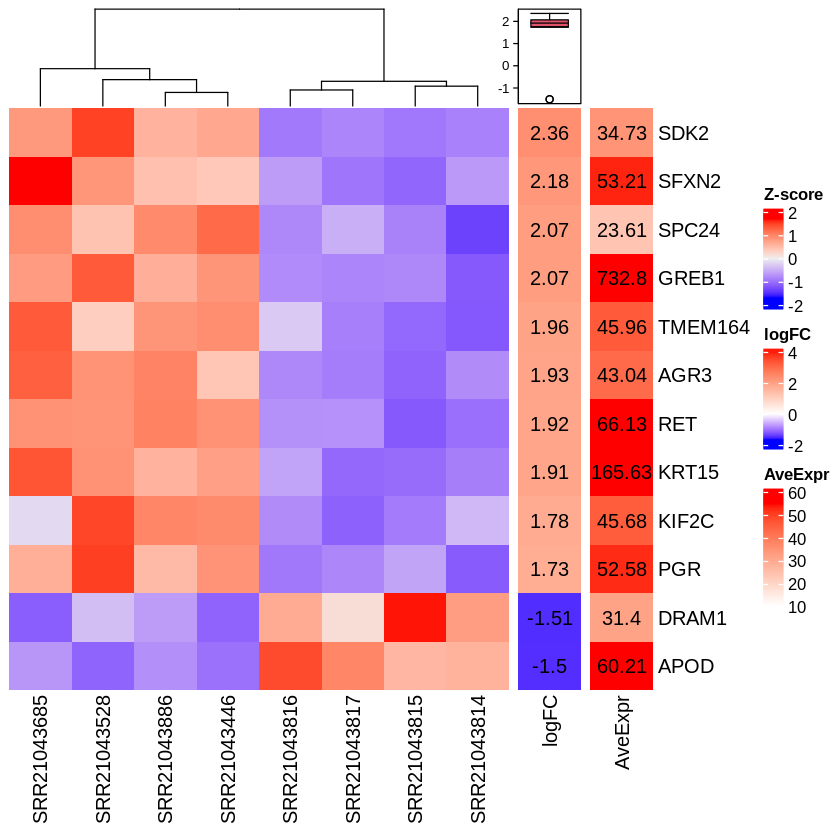

In [ ]:
df.top <- df[ (df$baseMean > 20) & (abs(df$log2FoldChange) > 1.5),]
df.top.up <- df.top[df.top$log2FoldChange > 0, ]
df.top.down <- df.top[df.top$log2FoldChange < 0, ]
df.top.up <- df.top.up[order(df.top.up$log2FoldChange, decreasing = TRUE),]
df.top.down <- df.top.down[order(df.top.down$log2FoldChange, decreasing = FALSE),]
num_keep_up <- min(num_keep, nrow(df.top.up))
num_keep_down <- min(num_keep, nrow(df.top.down))
rows_keep_up <- seq(1, num_keep_up)
rows_keep_down <- seq(1, num_keep_down)
df.top <- rbind(df.top.up[rows_keep_up, ], df.top.down[rows_keep_down, ])
mat <- assay(rlog_out)[rownames(df.top), rownames(coldata)]
colnames(mat) <- rownames(coldata)
mat.scaled <- t(apply(mat, 1, scale))
colnames(mat.scaled) <- colnames(mat)
l2_val <- as.matrix(df.top$log2FoldChange)
colnames(l2_val) <- "logFC"
mean <- as.matrix(df.top$baseMean)
colnames(mean) <- "AveExpr"
h1 <- Heatmap(mat.scaled, cluster_rows = FALSE,
              column_labels = colnames(mat.scaled), name = "Z-score",
              cluster_columns = TRUE)

h2 <- Heatmap(l2_val, row_labels = df.top$symbol,
              cluster_rows = FALSE, name = "logFC", top_annotation = ha, col = col_logFC,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(l2_val[i, j],2), x, y)
              })

h3 <- Heatmap(mean, row_labels = df.top$symbol,
              cluster_rows = FALSE, name = "AveExpr", col = col_AveExpr,
              cell_fun = function(j, i, x, y, w, h, col) {
                grid.text(round(mean[i, j],2), x, y)
              })
h <- h1 + h2 + h3
print(h)

In [ ]:
colnames(mat.scaled)

[1] "SRR21043446" "SRR21043528" "SRR21043685" "SRR21043886" "SRR21043816"
[6] "SRR21043814" "SRR21043817" "SRR21043815"